# <span style="color:orange;">**Projet Financement**</span>
## **Objectif précis d'utilisation du jeu de donnée à définir**
* *(Prédiction du financement d'un projet pour l'instant)*

## **Décomposition du notebook**
- Nettoyage des données
- Exploration rapides des données
- Feature Engineering
- Création de modèle prédictif
---

### <span style="color:#33ff99;">**Import des Librairies**</span>

In [2]:
import numpy as np             
import pandas as pd             
import os                       
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display
from random import seed
from datetime import datetime
import plotly.graph_objs as go
import plotly.express as px

### <span style="color:#33ff99;">**Import des données**</span>

In [3]:
financement = pd.read_csv(filepath_or_buffer='financement.csv', sep=',', header=0, index_col=0)

financement.head(5)

,ID,nom,categorie,categorie_principale,monaie,date_butoire,objectif,lancement,promesse,etat,supporters,pays,promesse_usd1,promesse_usd2,objectif_usd
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


#### <span style="color:lightblue;">**Fonction resume de jeu de données**</span>

In [4]:
def resume_dataframe(df):
    resume_df = pd.DataFrame(index=df.columns)
    resume_df['Type'] = df.dtypes.values
    resume_df['Missing'] = df.isnull().sum().values

    resume_df['Unique'] = df.nunique().values

    for col in df.columns:
        resume_df.loc[col, 'Value_1'] = df[col].iloc[0]
        resume_df.loc[col, 'Value_2'] = df[col].iloc[1]
        resume_df.loc[col, 'Value_3'] = df[col].iloc[2]

    return resume_df

resume_transactions = resume_dataframe(financement)

display(resume_transactions)

C:\Users\rapha\AppData\Local\Temp\ipykernel_18732\1007268014.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'The Songs of Adelaide & Abullah' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  resume_df.loc[col, 'Value_1'] = df[col].iloc[0]
C:\Users\rapha\AppData\Local\Temp\ipykernel_18732\1007268014.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Greeting From Earth: ZGAC Arts Capsule For ET' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  resume_df.loc[col, 'Value_2'] = df[col].iloc[1]
C:\Users\rapha\AppData\Local\Temp\ipykernel_18732\1007268014.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Where is Hank?' has dtype incompatible with float64, please explicitly cast to a comp

,Type,Missing,Unique,Value_1,Value_2,Value_3
ID,int64,0,378661,1000002330.0,1000003930.0,1000004038.0
nom,object,4,375764,The Songs of Adelaide & Abullah,Greeting From Earth: ZGAC Arts Capsule For ET,Where is Hank?
categorie,object,0,159,Poetry,Narrative Film,Narrative Film
categorie_principale,object,0,15,Publishing,Film & Video,Film & Video
monaie,object,0,14,GBP,USD,USD
date_butoire,object,0,3164,2015-10-09,2017-11-01,2013-02-26
objectif,float64,0,8353,1000.0,30000.0,45000.0
lancement,object,0,378089,2015-08-11 12:12:28,2017-09-02 04:43:57,2013-01-12 00:20:50
promesse,float64,0,62130,0.0,2421.0,220.0
etat,object,0,6,failed,failed,failed


### On **remarque** que la variable promesse_usd1 (= promesse transformé en USD par le site fixer.io est souvent manquante ou valorisé à 0)
#### *Par la suite, on **préferera utiliser promesse_usd2** qui semble plus fiable*

#### <span style="color:lightblue;">**Remplacer les valeurs NaN par 0 dans la colonne promesse_usd1**</span>

In [5]:
financement['promesse_usd1'].fillna(0, inplace=True)

#### <span style="color:lightblue;">**Traitement des dates**</span>
#### <span style="color:lightblue;">**+ ajout ecart entre date de début de lancement de recherche de financement et butoire du projet**</span>

In [6]:
# Pour la date butoire
def get_day(date_str):
    return date_str.split('-')[2]

def get_month(date_str):
    return date_str.split('-')[1]

def get_year(date_str):
    return date_str.split('-')[0]

# Pour la date de lancement
def get_day2(date_str):
    return date_str.split(' ')[0].split('-')[2]

def get_hour(time_str):
    return time_str.split(' ')[1].split(':')[0]

def get_minute(time_str):
    return time_str.split(' ')[1].split(':')[1]

def get_second(time_str):
    return time_str.split(' ')[1].split(':')[2]

# Feature nb de jours d'ecart
def calculer_ecart(date_butoire_str, lancement_str):
    # Convertir les chaînes de caractères en objets datetime
    date_butoire = datetime.strptime(date_butoire_str, '%Y-%m-%d')
    lancement = datetime.strptime(lancement_str.split()[0], '%Y-%m-%d')
    
    # Calculer l'écart entre les deux dates
    ecart = (date_butoire - lancement).days
    
    return ecart

# Date butoire
days_butoire = financement['date_butoire'].apply(get_day)
months_butoire = financement['date_butoire'].apply(get_month)
years_butoire = financement['date_butoire'].apply(get_year)

financement['day_butoire'] = days_butoire
financement['month_butoire'] = months_butoire
financement['year_butoire'] = years_butoire

# Date de lancement
days_lancement = financement['lancement'].apply(get_day2)
months_lancement = financement['lancement'].apply(get_month)
years_lancement = financement['lancement'].apply(get_year)
hours_lancement = financement['lancement'].apply(get_hour)
minutes_lancement = financement['lancement'].apply(get_minute)
seconds_lancement = financement['lancement'].apply(get_second)

#financement['day_lancement'] = days_lancement
financement['month_lancement'] = months_lancement
financement['year_lancement'] = years_lancement
#financement['hour_lancement'] = hours_lancement
#financement['minute_lancement'] = minutes_lancement
#financement['second_lancement'] = seconds_lancement

# Ecart
financement['ecart_jours'] = financement.apply(lambda row: calculer_ecart(row['date_butoire'], row['lancement']), axis=1)

# Afficher les 5 premières lignes du DataFrame après les modifications
display(financement.head())

,ID,nom,categorie,categorie_principale,monaie,date_butoire,objectif,lancement,promesse,etat,...,pays,promesse_usd1,promesse_usd2,objectif_usd,day_butoire,month_butoire,year_butoire,month_lancement,year_lancement,ecart_jours
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,GB,0.0,0.0,1533.95,09,10,2015,08,2015,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,US,100.0,2421.0,30000.00,01,11,2017,09,2017,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,US,220.0,220.0,45000.00,26,02,2013,01,2013,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,US,1.0,1.0,5000.00,16,04,2012,03,2012,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,US,1283.0,1283.0,19500.00,29,08,2015,07,2015,56


#### <span style="color:lightblue;">**Fonction exploration variables catégorielles**</span>

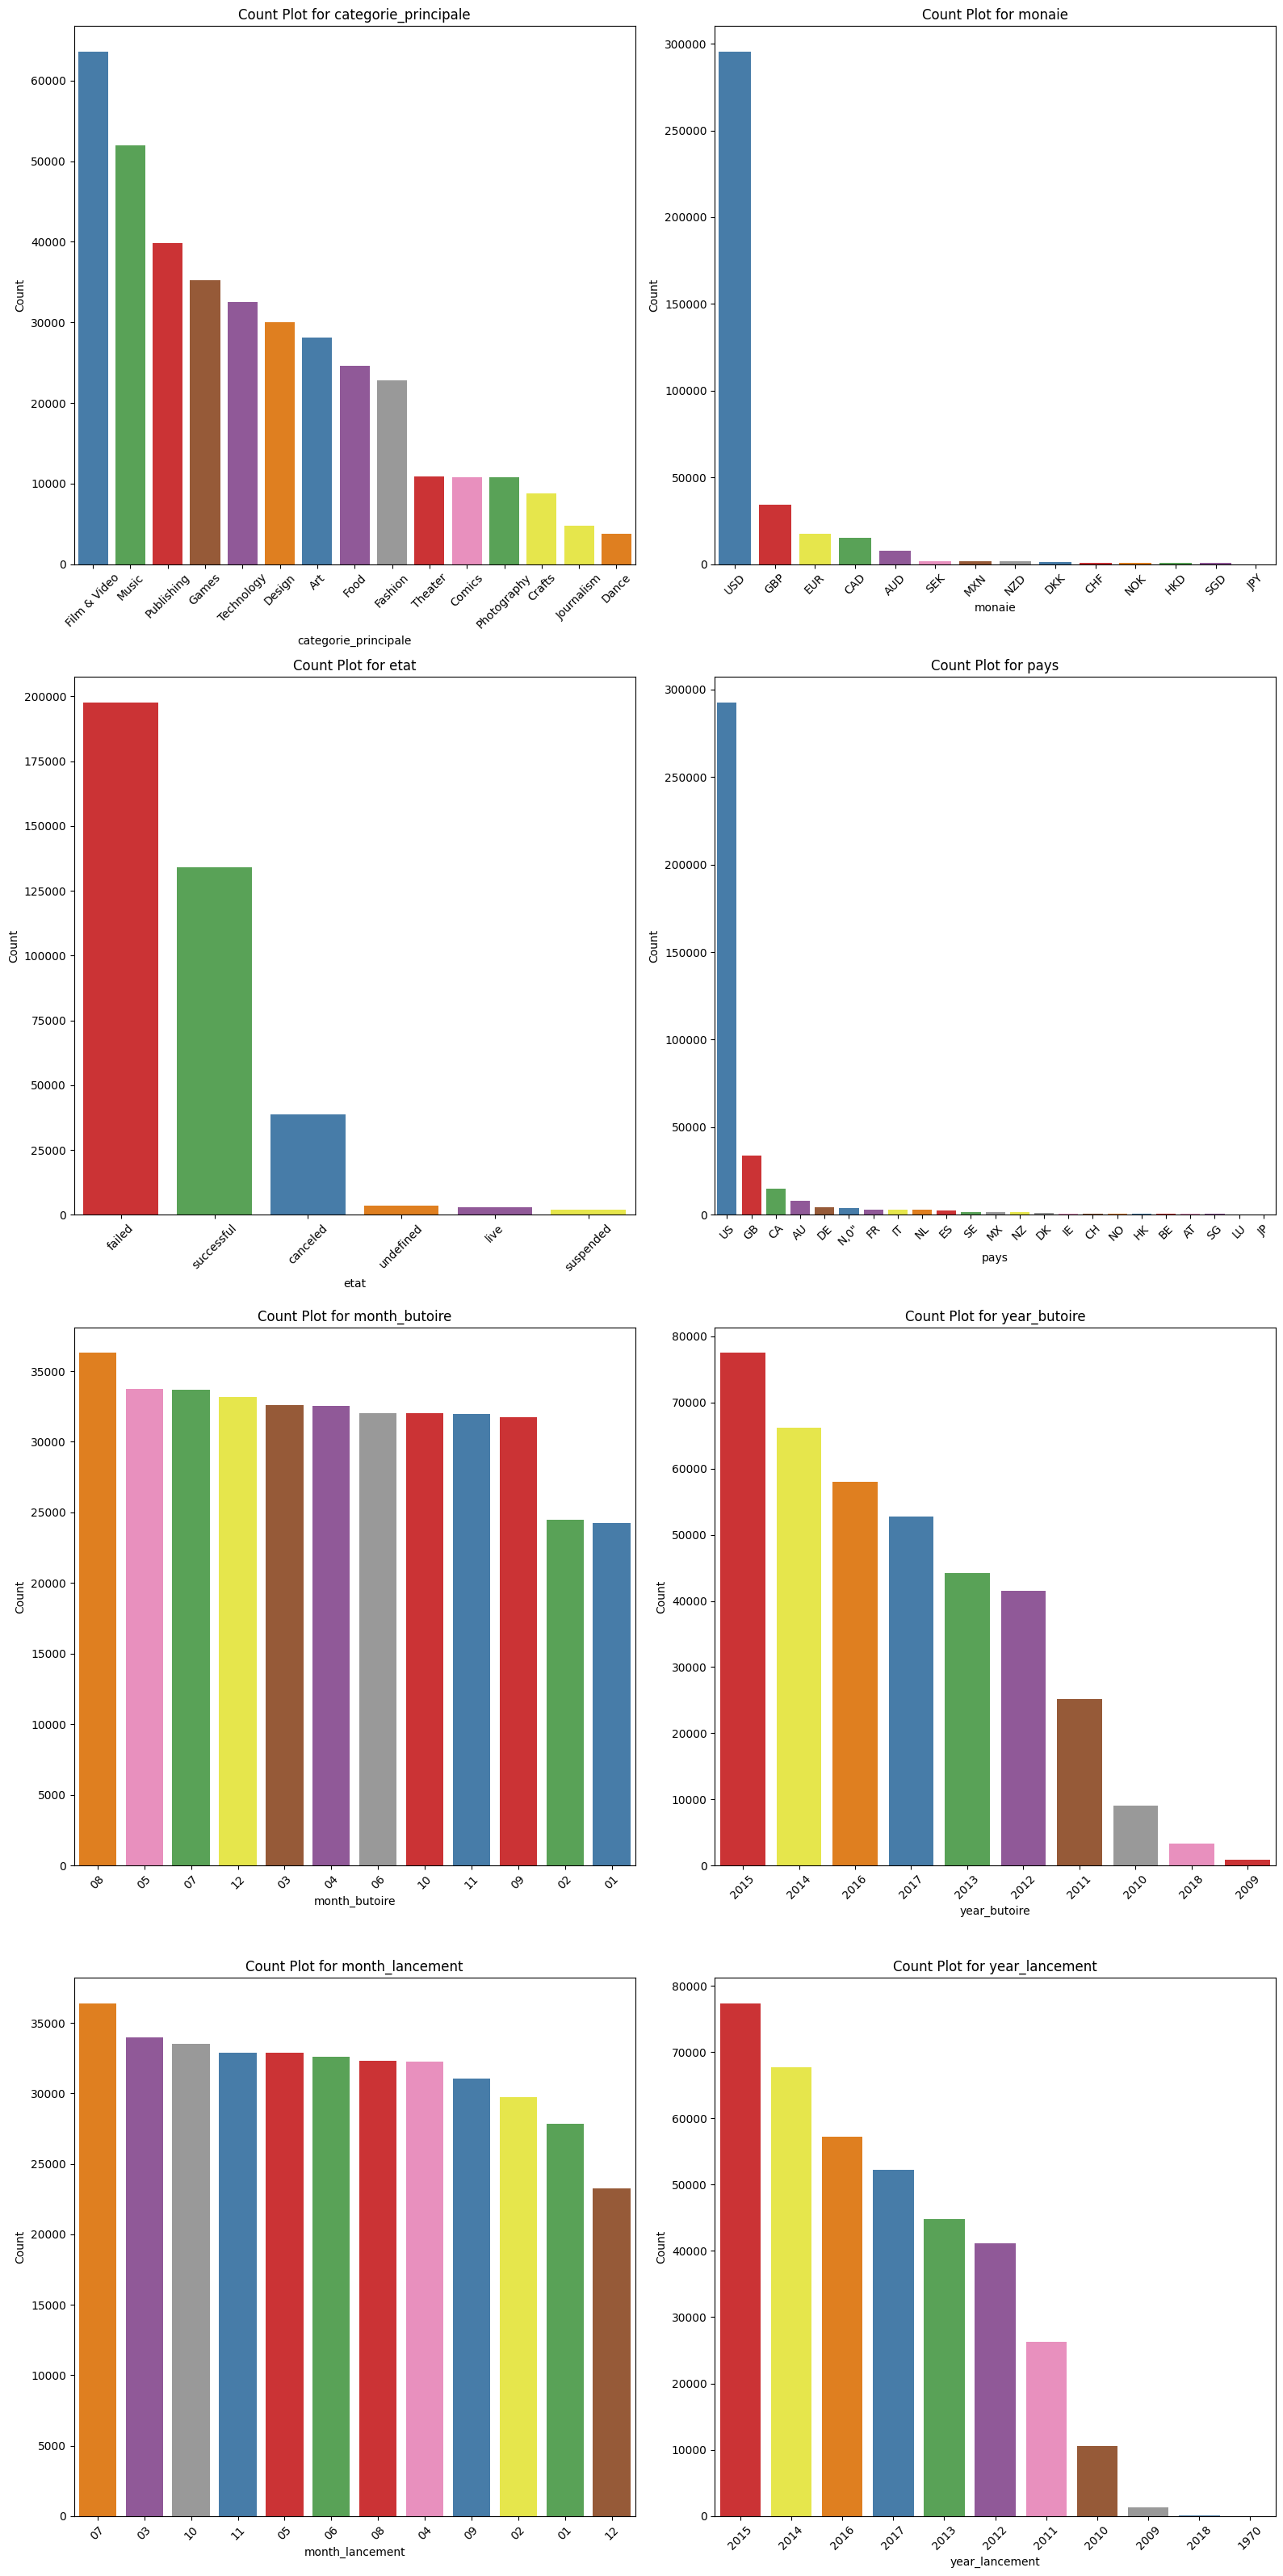

In [7]:
def explore_dataset(df):
    # Exclure la colonne 'ID'
    columns_to_explore = [col for col in df.columns if col != 'ID']
    num_graphs = sum(df[col].nunique() <= 25 for col in columns_to_explore)
    num_cols = 2 
    num_rows = (num_graphs + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8*num_rows))

    graph_counter = 0
    for i, col in enumerate(columns_to_explore):
        if df[col].nunique() <= 25:
            row_pos = graph_counter // num_cols
            col_pos = graph_counter % num_cols
            sns.countplot(x=col, hue=col, data=df, ax=axes[row_pos, col_pos], order=df[col].value_counts().index, palette='Set1', legend=False)
            axes[row_pos, col_pos].set_title(f'Count Plot for {col}')
            axes[row_pos, col_pos].set_xlabel(col)
            axes[row_pos, col_pos].set_ylabel('Count')
            axes[row_pos, col_pos].tick_params(axis='x', rotation=45)
            graph_counter += 1

    plt.tight_layout()
    plt.show()

explore_dataset(financement)


### On **remarque** plusieurs choses:
* La majorité des projets sont issues des États-Unis d'Amérique 
* La majorité des projets ont pour monnaie principale le dollar américain (Cohérent avec le point ci-dessus)
* Environ 1/3 des projets ont été financés *(Penser à vérifier la prop dans les jeux de train/test)*
* Il existe beacoup de pays et certains sont peu représentés. Il serait intéressant de les regrouper par *continent*

#### <span style="color:lightblue;">**Fonction exploration variables quantitatives**</span>

In [8]:
def obtenir_informations_statistiques(df):
    # Sélectionner les variables numériques
    variables_numeriques = ['objectif_usd', 'promesse_usd2']

    # Obtenir les informations statistiques classiques
    statistiques = df[variables_numeriques].describe().transpose()

    display(statistiques)

obtenir_informations_statistiques(financement)

,count,mean,std,min,25%,50%,75%,max
objectif_usd,378661.0,45454.401465,1.152950e+06,0.01,2000.0,5500.00,15500.0,1.663614e+08
promesse_usd2,378661.0,9058.924074,9.097334e+04,0.00,31.0,624.33,4050.0,2.033899e+07


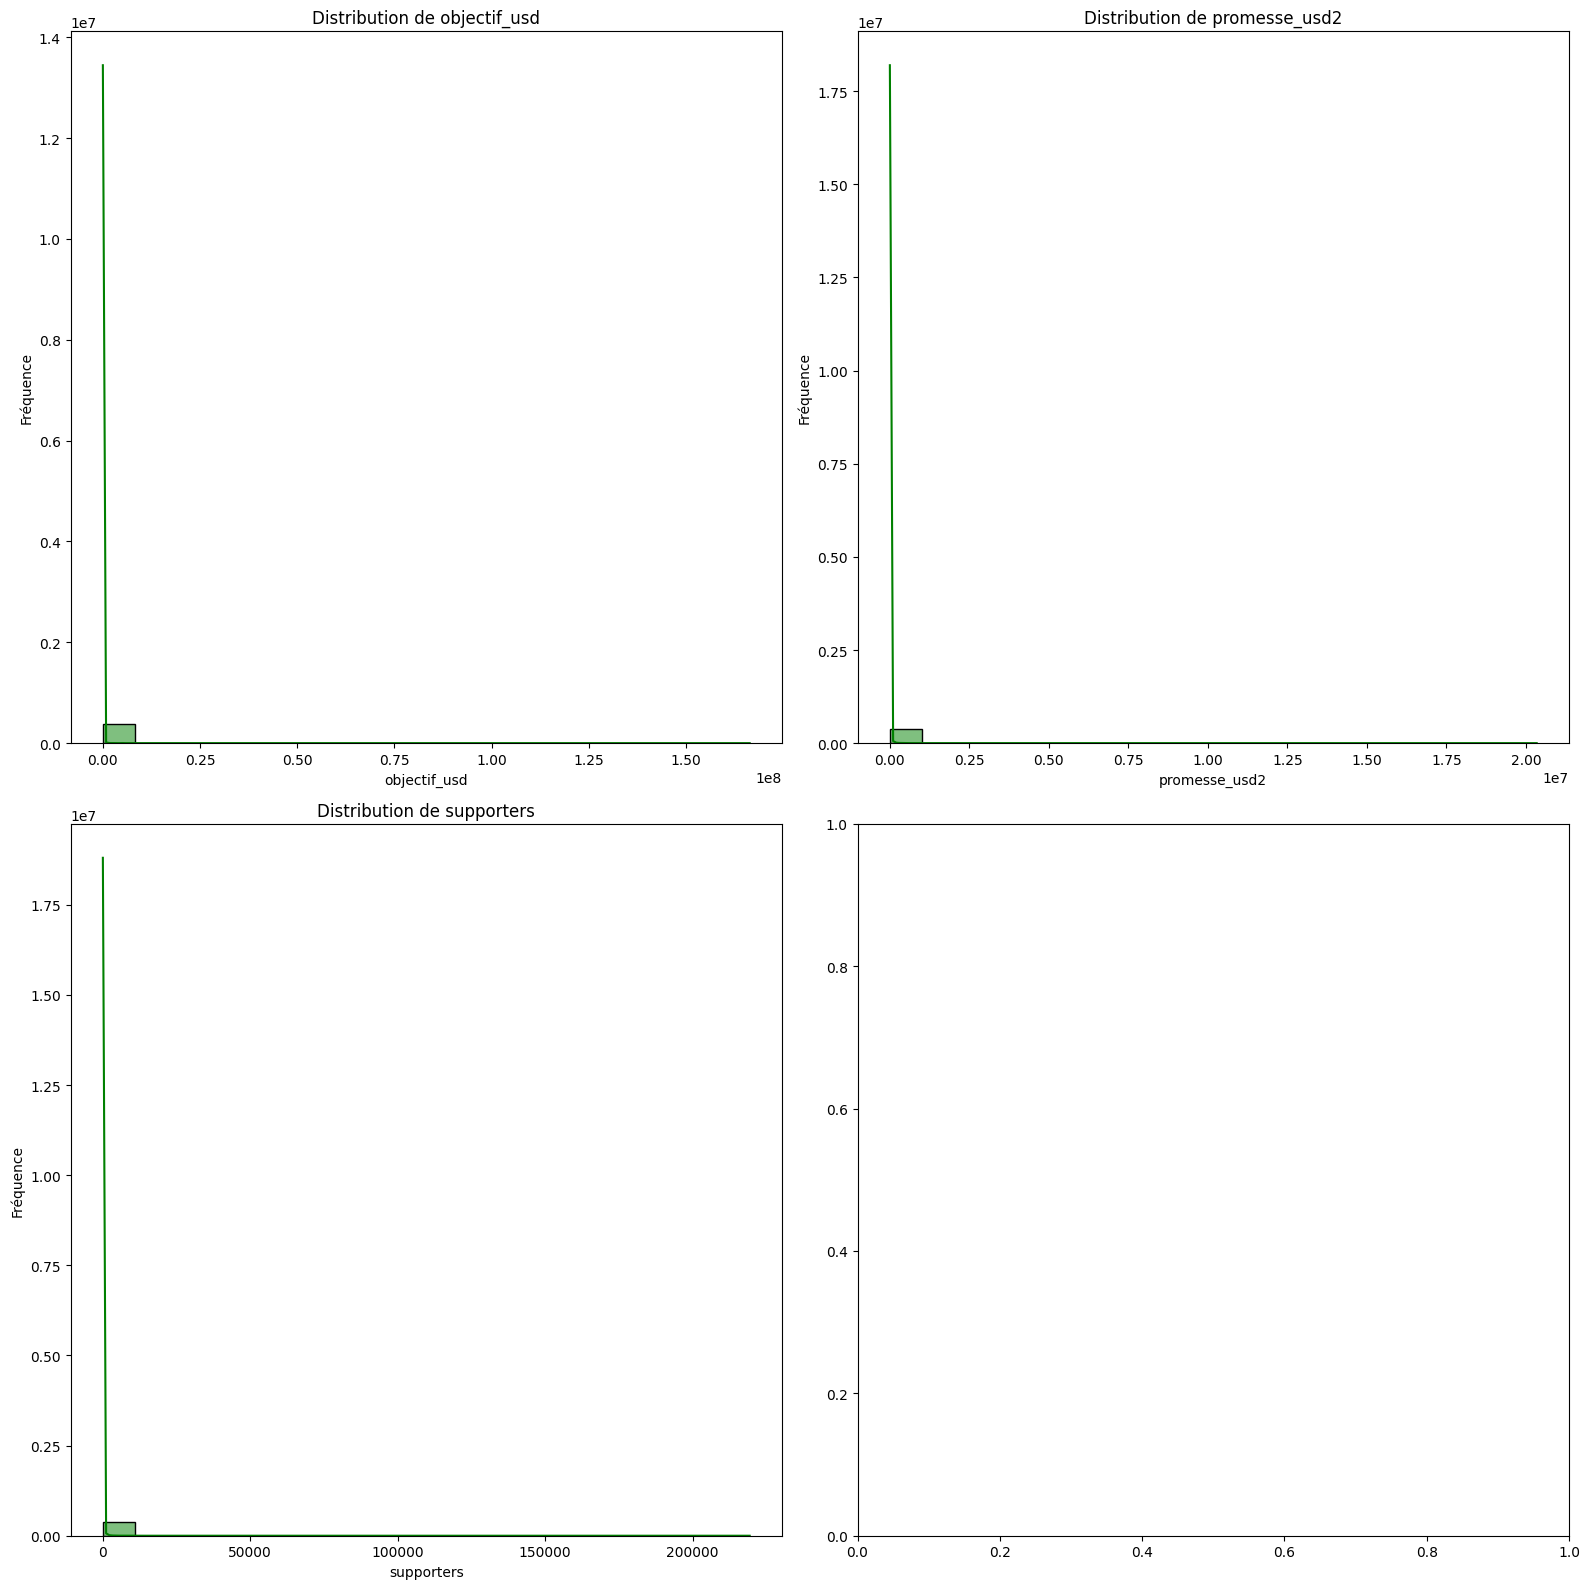

In [9]:
def explore_variables_numeriques(df):
    # Sélectionner les variables numériques
    variables_numeriques = ['objectif_usd', 'promesse_usd2','supporters']

    num_graphs = len(variables_numeriques)
    num_cols = 2
    num_rows = (num_graphs + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8*num_rows))

    for i, var in enumerate(variables_numeriques):
        row_pos = i // num_cols
        col_pos = i % num_cols
        if num_rows == 1:
            sns.histplot(data=df, x=var, kde=True, ax=axes[col_pos], bins=20, color="green")
            axes[col_pos].set_title(f'Distribution de {var}')
            axes[col_pos].set_xlabel(var)
            axes[col_pos].set_ylabel('Fréquence')
        else:
            sns.histplot(data=df, x=var, kde=True, ax=axes[row_pos, col_pos], bins=20, color="green")
            axes[row_pos, col_pos].set_title(f'Distribution de {var}')
            axes[row_pos, col_pos].set_xlabel(var)
            axes[row_pos, col_pos].set_ylabel('Fréquence')

    plt.tight_layout()
    plt.show()

explore_variables_numeriques(financement)

### On **n'observe** pas grand chose... En effet, les valeurs extrêmes maximales empèchent une bonne lisibilité des graphes

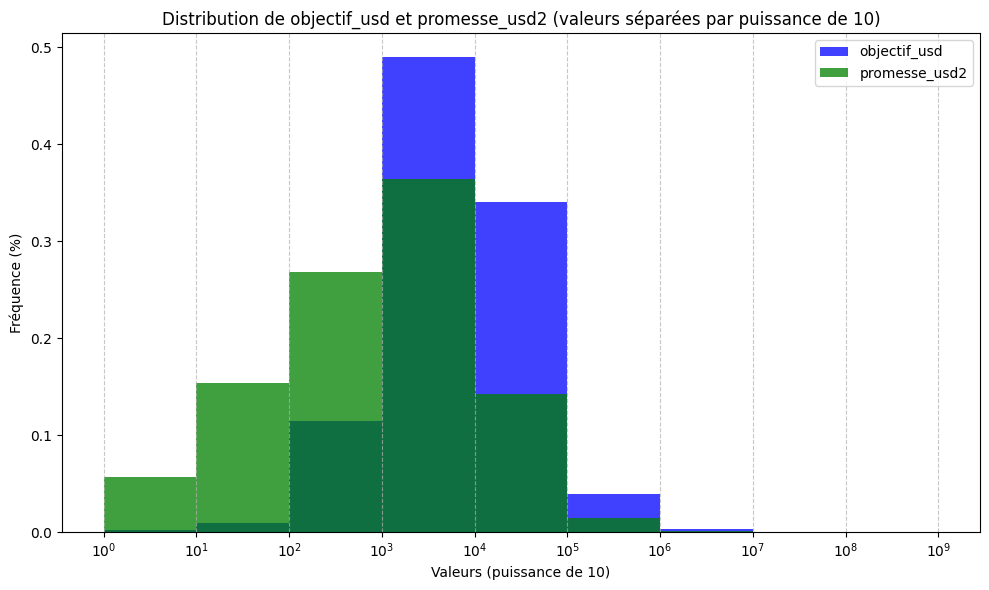

In [10]:
def histoplot_combined_objectif_promesse(df):
    # Séparer les valeurs par puissance de 10
    bins_objectif = [10**i for i in range(0, int(np.ceil(np.log10(df['objectif_usd'].max()))) + 1)]
    bins_promesse = [10**i for i in range(0, int(np.ceil(np.log10(df['promesse_usd2'].max()))) + 1)]

    plt.figure(figsize=(10, 6))

    sns.histplot(data=df, x='objectif_usd', bins=bins_objectif, color='blue', stat='probability', label='objectif_usd', multiple='layer')
    sns.histplot(data=df, x='promesse_usd2', bins=bins_promesse, color='green', stat='probability', label='promesse_usd2', multiple='layer')

    plt.title('Distribution de objectif_usd et promesse_usd2 (valeurs séparées par puissance de 10)')
    plt.xlabel('Valeurs (puissance de 10)')
    plt.ylabel('Fréquence (%)')
    plt.xscale('log')  # Utiliser une échelle logarithmique sur l'axe x pour mieux visualiser les valeurs
    plt.xticks([10**i for i in range(0, int(np.ceil(np.log10(max(df['objectif_usd'].max(), df['promesse_usd2'].max())))) + 1)])  # Marques de graduations sur l'axe x
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Ajouter une grille pour faciliter la lecture
    plt.legend()

    plt.tight_layout()
    plt.show()

histoplot_combined_objectif_promesse(financement)

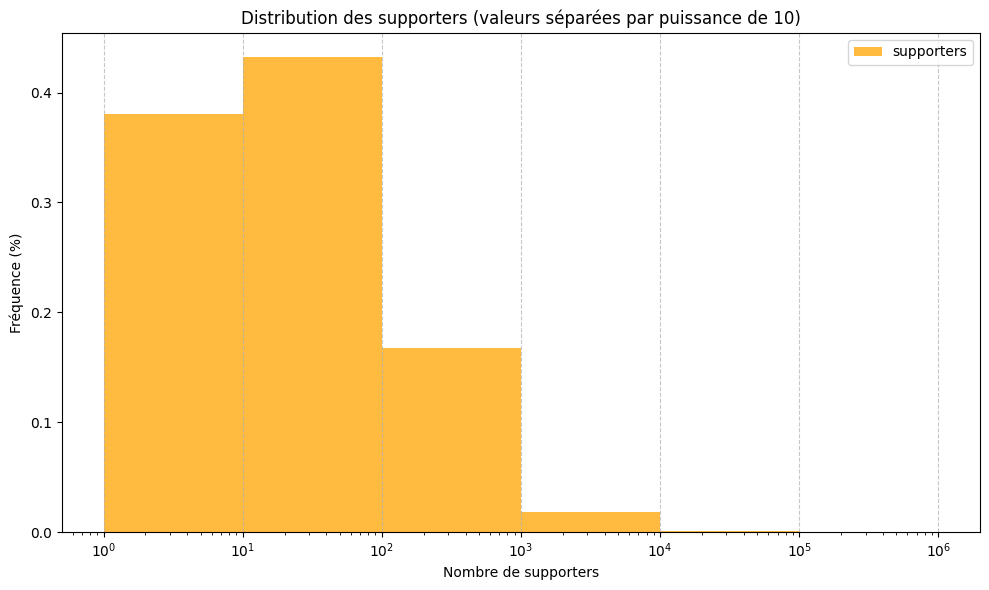

In [11]:
def histoplot_supporters(df):
    # Séparer les valeurs par puissance de 10
    bins_supporters = [10**i for i in range(0, int(np.ceil(np.log10(df['supporters'].max()))) + 1)]

    plt.figure(figsize=(10, 6))

    sns.histplot(data=df, x='supporters', bins=bins_supporters, color='orange', stat='probability', label='supporters')

    plt.title('Distribution des supporters (valeurs séparées par puissance de 10)')
    plt.xlabel('Nombre de supporters')
    plt.ylabel('Fréquence (%)')
    plt.xscale('log')
    plt.xticks([10**i for i in range(0, int(np.ceil(np.log10(df['supporters'].max()))) + 1)])  
    plt.grid(axis='x', linestyle='--', alpha=0.7)  
    plt.legend()

    plt.tight_layout()
    plt.show()

histoplot_supporters(financement)

### Ici aussi, on visualise beaucoup mieux la repartition du nombre de <span style="color:orange;">**supporters**</span> potentiels

#### <span style="color:lightblue;">**Dummifier les variables catégorielles**</span>

In [12]:
# Sélectionner les variables catégorielles à dummifier
cat_columns = ['categorie', 'categorie_principale', 'monaie']

# Dummification des variables catégorielles
financement = pd.get_dummies(financement, columns=cat_columns, drop_first=False) 

# Afficher les premières lignes du nouveau DataFrame
display(financement.head())

,ID,nom,date_butoire,objectif,lancement,promesse,etat,supporters,pays,promesse_usd1,...,monaie_EUR,monaie_GBP,monaie_HKD,monaie_JPY,monaie_MXN,monaie_NOK,monaie_NZD,monaie_SEK,monaie_SGD,monaie_USD
0,1000002330,The Songs of Adelaide & Abullah,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,...,False,True,False,False,False,False,False,False,False,False
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,...,False,False,False,False,False,False,False,False,False,True
2,1000004038,Where is Hank?,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,...,False,False,False,False,False,False,False,False,False,True
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,...,False,False,False,False,False,False,False,False,False,True
4,1000011046,Community Film Project: The Art of Neighborhoo...,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,...,False,False,False,False,False,False,False,False,False,True


#### <span style="color:lightblue;">**Feature Engineering sur la variable nom**</span>

In [13]:
def feature_engineering_nom(df):
    # Créer une nouvelle colonne contenant le nombre de mots dans chaque nom
    df['nombre_mots_nom'] = df['nom'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

    # Créer une nouvelle colonne contenant le nombre total de caractères dans chaque nom 
    df['nombre_caracteres_nom'] = df['nom'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

    return df

financement = feature_engineering_nom(financement)

display(financement[['nom', 'nombre_mots_nom', 'nombre_caracteres_nom']].head(15))

,nom,nombre_mots_nom,nombre_caracteres_nom
0,The Songs of Adelaide & Abullah,6,31
1,Greeting From Earth: ZGAC Arts Capsule For ET,8,45
2,Where is Hank?,3,14
3,ToshiCapital Rekordz Needs Help to Complete Album,7,49
4,Community Film Project: The Art of Neighborhoo...,8,58
5,Monarch Espresso Bar,3,20
6,Support Solar Roasted Coffee & Green Energy! ...,8,60
7,Chaser Strips. Our Strips make Shots their B*tch!,8,49
8,SPIN - Premium Retractable In-Ear Headphones w...,8,53
9,STUDIO IN THE SKY - A Documentary Feature Film...,10,57


### Feature Engineering Sur les pays

In [14]:
unique_countries = financement['pays'].unique()
print("Pays uniques dans l'ensemble de données :")
for country in unique_countries:
    print(country)

Pays uniques dans l'ensemble de données :
GB
US
CA
AU
NO
IT
DE
IE
MX
ES
N,0"
SE
FR
NL
NZ
CH
AT
DK
BE
HK
LU
SG
JP


In [15]:
pays_continent = {
    'GB': 'Europe',
    'US': 'Amerique_du_Nord',
    'CA': 'Amerique_du_Nord',
    'AU': 'Océanie',
    'NO': 'Europe',
    'IT': 'Europe',
    'DE': 'Europe',
    'IE': 'Europe',
    'MX': 'Amerique_du_Nord',
    'ES': 'Europe',
    'SE': 'Europe',
    'FR': 'Europe',
    'NL': 'Europe',
    'NZ': 'Océanie',
    'CH': 'Europe',
    'AT': 'Europe',
    'DK': 'Europe',
    'BE': 'Europe',
    'HK': 'Asie',
    'LU': 'Europe',
    'SG': 'Asie',
    'JP': 'Asie'
}

financement['continent'] = financement['pays'].map(pays_continent)

financement['continent'] = financement['continent'].fillna('Autres')

display(financement[['pays', 'continent']].head(15))

,pays,continent
0,GB,Europe
1,US,Amerique_du_Nord
2,US,Amerique_du_Nord
3,US,Amerique_du_Nord
4,US,Amerique_du_Nord
5,US,Amerique_du_Nord
6,US,Amerique_du_Nord
7,US,Amerique_du_Nord
8,US,Amerique_du_Nord
9,US,Amerique_du_Nord


In [16]:
# Dummification de Continent
financement = pd.get_dummies(financement, columns=["continent"], drop_first=False) # Suppression de la variable initiale

### **Intéressons nous de plus prêt aux corrélations potentielles maintenant que nous disposons de toutes nos variables au format quantitatif**

In [17]:
# Suppression des colonnes non quantitatives
financement_quanti = financement.drop(['ID', 'nom', 'date_butoire', 'lancement', 'pays'], axis=1)
filter_categ = financement_quanti.filter(like='categorie').columns
filter_monaie = financement_quanti.filter(like='monaie').columns

drop_list = ['etat'] # Target non quanti
drop_list.extend(filter_categ)
drop_list.extend(filter_monaie)

print(drop_list)

correlation = financement_quanti.drop(drop_list, axis=1).corr()

# Création de la heatmap avec Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation.values,
    x=correlation.columns,
    y=correlation.index,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    colorbar=dict(title='Corrélation')
))

fig.update_layout(
    title='Heatmap des corrélations entre les variables qualitatives de dfWine',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    width=800,
    height=600
)

fig.show()

['etat', 'categorie_3D Printing', 'categorie_Academic', 'categorie_Accessories', 'categorie_Action', 'categorie_Animals', 'categorie_Animation', 'categorie_Anthologies', 'categorie_Apparel', 'categorie_Apps', 'categorie_Architecture', 'categorie_Art', 'categorie_Art Books', 'categorie_Audio', 'categorie_Bacon', 'categorie_Blues', 'categorie_Calendars', 'categorie_Camera Equipment', 'categorie_Candles', 'categorie_Ceramics', "categorie_Children's Books", 'categorie_Childrenswear', 'categorie_Chiptune', 'categorie_Civic Design', 'categorie_Classical Music', 'categorie_Comedy', 'categorie_Comic Books', 'categorie_Comics', 'categorie_Community Gardens', 'categorie_Conceptual Art', 'categorie_Cookbooks', 'categorie_Country & Folk', 'categorie_Couture', 'categorie_Crafts', 'categorie_Crochet', 'categorie_DIY', 'categorie_DIY Electronics', 'categorie_Dance', 'categorie_Design', 'categorie_Digital Art', 'categorie_Documentary', 'categorie_Drama', 'categorie_Drinks', 'categorie_Electronic Music

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [18]:
print(financement['ecart_jours'].mean())

34.481095227657455


### On **remarque** plusieurs corrélations mais rien qui semble improbable, en effet :
* Objectif et Objectif_usd sont liés, rien d'étonnant
* Promesse est corrélé à promesse_usd1 et 2, pour les même raisons que le sont celles du dessus
* On trouve aussi une forte corrélation entre l'année de lancement de la recherche de fond et l'année butoire, indiquant une récolte de fond sur une période assez courte (35 jours en moyenne d'après les données)
* On a une corrélation entre la taille du nom du projet et le nombre de mots qui le compose, la encore rien de surprenant
* Enfin, une corrélation fortement négative relie l'appartenance du projet aux EUA et à l'Europe, la encore c'est parfaitement normal (et peut être supprimé avec le paramètre *drop_first=True* dans le *get_dummies*)

#### <span style="color:lightblue;">**Selection de champs**</span>

In [19]:
# Supprimer les colonnes non pertinentes
liste_drop = ['objectif', 'promesse', 'promesse_usd1']
data_reg = financement_quanti.drop(liste_drop, axis=1)

#### <span style="color:lightblue;">**Expérimentation de prédiction de l'état *"succès"* d'un projet en demande de financement**</span>

In [20]:
from sklearn.model_selection import train_test_split

# Séparation des variables indépendantes (X) et de la variable cible (y)
X = data_reg.drop('etat', axis=1)
y = (data_reg['etat'] == "successful").astype(int)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <span style="color:#33ff99;">**Import des librairies de modélisation**</span>

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

#### <span style="color:lightblue;">**Régression Linéaire**</span>

In [22]:
# Initialisation du modèle de régression linéaire
linear_model = LinearRegression()

# Entraînement du modèle
linear_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = linear_model.predict(X_test)

# Binarisation des prédictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Accuracy: 0.6882996844176251
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.78     48981
           1       0.61      0.34      0.43     26752

    accuracy                           0.69     75733
   macro avg       0.66      0.61      0.61     75733
weighted avg       0.67      0.69      0.66     75733



### La **régression linéaire** nous propose un premier modèle **peu satisfaisant** mais prometteur pour la suite

#### <span style="color:lightblue;">**Régression Logistique**</span>

In [23]:
# Initialisation du modèle de régression logistique
model = LogisticRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

c:\Users\rapha\OneDrive\Bureau\fouillesEtEntreposage\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.9796521991734118
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     48981
           1       0.96      0.98      0.97     26752

    accuracy                           0.98     75733
   macro avg       0.98      0.98      0.98     75733
weighted avg       0.98      0.98      0.98     75733



### La **régression logistique** nous propose un modèle beaucoup plus **satisfaisant**, avec une **accuracy** de **0.98 !**

#### <span style="color:lightblue;">**Random Forest**</span>

In [24]:
# Initialisation du modèle de forêt aléatoire
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)

# Entraînement du modèle
rf_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

# Calcul de l'accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9015884753013877
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     48981
           1       0.87      0.85      0.86     26752

    accuracy                           0.90     75733
   macro avg       0.89      0.89      0.89     75733
weighted avg       0.90      0.90      0.90     75733



### Le **random forest** nous propose un modèle legèrement **moins satisfaisant** que la régression linéaire (mais l'optimisation des paramètre peut surement donner de meilleurs résultats)

#### <span style="color:lightblue;">**Gradient Boosting Machine**</span>

In [25]:
# Initialisation du modèle GBM
gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=7, learning_rate=0.1, random_state=42)

# Entraînement du modèle
gbm_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_gbm = gbm_model.predict(X_test)

# Calcul de l'accuracy
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Gradient Boosting Machine Accuracy:", accuracy_gbm)

Gradient Boosting Machine Accuracy: 0.9953917050691244


### Le **GBM** nous propose un modèle encore **plus performant** que la régression linéaire (en utilisant des paramètres presque par défaut)

### Prédiction du montant de financement

Linear regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data preparation
financement_finance = financement[financement['etat'] == 'successful']

# Supprimer les colonnes non nécessaires
liste_drop = ['objectif', 'promesse', 'promesse_usd1', 'supporters','etat','nom','lancement','date_butoire','pays']
filter_continent = financement_finance.filter(like='continent').columns
liste_drop.extend(filter_continent)  # Ces données ne sont pas nécessaires pour la problématique définie

data_reg = financement_finance.drop(liste_drop, axis=1)

# Utilisation des données dummifiées
X = data_reg.drop('promesse_usd2', axis=1)  # Assurez-vous de remplacer 'target_column' par le nom de votre colonne cible
y = financement_finance['promesse_usd2']

# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Calcul de l'erreur en pourcentage
errors = abs(y_pred - y_test)
percentage_errors = (errors / y_test) * 100
mean_percentage_error = percentage_errors.mean()
print("Mean Percentage Error:", mean_percentage_error)


Mean Squared Error: 11295008358.369673
R-squared: 0.3710667204603968
Mean Percentage Error: 884.9870681149356


Pas ouf le résultat

Random forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Encodage des variables catégorielles
X = data_reg.drop('promesse_usd2', axis=1)  # Assurez-vous de remplacer 'target_column' par le nom de votre colonne cible
y = financement_finance['promesse_usd2']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 14291882719.92223
R-squared: 0.20419353535268236


GBM

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

X = data_reg.drop('promesse_usd2', axis=1)  # Assurez-vous de remplacer 'target_column' par le nom de votre colonne cible
y = financement_finance['promesse_usd2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.01, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 11473466572.598434
R-squared: 0.3611297371156693


In [29]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

X = data_reg.drop('promesse_usd2', axis=1)  
y = financement_finance['promesse_usd2']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle SVM
model = SVR(kernel='linear')  # Choisissez le noyau approprié, tel que 'linear', 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


In [ ]:
data_reg.head(1)

,ID,promesse_usd2,objectif_usd,day_butoire,month_butoire,year_butoire,month_lancement,year_lancement,ecart_jours,categorie_3D Printing,...,monaie_HKD,monaie_JPY,monaie_MXN,monaie_NOK,monaie_NZD,monaie_SEK,monaie_SGD,monaie_USD,nombre_mots_nom,nombre_caracteres_nom
5,1000014025,52375.0,50000.0,01,04,2016,02,2016,35,False,...,False,False,False,False,False,False,False,True,3,20
